In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('data_brain_own_model_design.csv')

In [3]:
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
Gender                 237 non-null int64
Age Range              237 non-null int64
Head Size(cm^3)        237 non-null int64
Brain Weight(grams)    237 non-null int64
dtypes: int64(4)
memory usage: 7.5 KB


In [5]:
data.describe()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


In [6]:
data.corr()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
Gender,1.000000,-0.088652,-0.514050,-0.465266
Age Range,-0.088652,1.000000,-0.105428,-0.169438
Head Size(cm^3),-0.514050,-0.105428,1.000000,0.799570
Brain Weight(grams),-0.465266,-0.169438,0.799570,1.000000


In [7]:
data.keys()

Index(['Gender', 'Age Range', 'Head Size(cm^3)', 'Brain Weight(grams)'], dtype='object')

In [8]:
X_INPUT = data.iloc[:, 0:3]
Y_TARGET = data.iloc[:, 3]

In [9]:
Y_TARGET.head()

0    1530
1    1297
2    1335
3    1282
4    1590
Name: Brain Weight(grams), dtype: int64

In [10]:
X_INPUT.head()

,Gender,Age Range,Head Size(cm^3)
0,1,1,4512
1,1,1,3738
2,1,1,4261
3,1,1,3777
4,1,1,4177


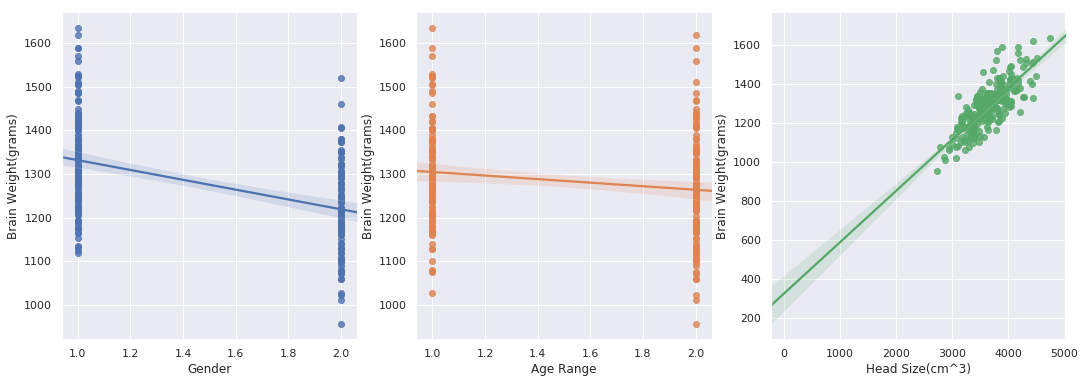

In [14]:
f, axes = plt.subplots(1, 3)
sns.set(rc={'figure.figsize':(18, 6)})
sns.regplot(x='Gender', y='Brain Weight(grams)', data=data, ax=axes[0])
sns.regplot(x='Age Range', y='Brain Weight(grams)', data=data, ax=axes[1])
sns.regplot(x='Head Size(cm^3)', y='Brain Weight(grams)', data=data, ax=axes[2])
sns.despine()

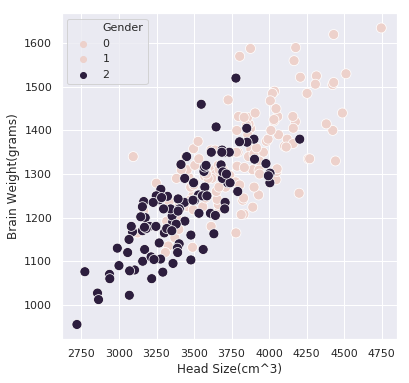

In [15]:
sns.set(rc={'figure.figsize':(6, 6)})
sns.scatterplot(x='Head Size(cm^3)', y='Brain Weight(grams)', hue='Gender', data=data, s=100)

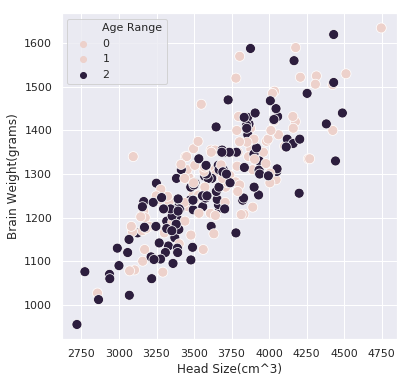

In [16]:
sns.set(rc={'figure.figsize':(6, 6)})
sns.scatterplot(x='Head Size(cm^3)', y='Brain Weight(grams)', hue='Age Range', data=data, s=100)

In [18]:
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X_INPUT, Y_TARGET)

In [19]:
X_TRAIN.shape, Y_TRAIN.shape

((177, 3), (177,))

In [20]:
Y_TARGET.shape, X_INPUT.shape

((237,), (237, 3))

In [21]:
model = LinearRegression()

In [22]:
model.fit(X_TRAIN, Y_TRAIN)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
model.intercept_

407.98389012011455

In [24]:
model.coef_

array([-18.9525327 , -20.64200782,   0.25852829])

In [25]:
YP = model.predict(X_TEST)

In [26]:
error = mean_squared_error(Y_TEST, YP)
np.sqrt(error)

72.68328780647296

In [27]:
model.score(X_TEST, Y_TEST)

0.6168379776233313

# Try with only Head Size

In [28]:
X_INPUT = data.iloc[:, 2]
X_INPUT = X_INPUT.values.reshape(-1, 1)
Y_TARGET = data.iloc[:, 3]

In [29]:
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X_INPUT, Y_TARGET)

In [30]:
model = LinearRegression()
model.fit(X_TRAIN, Y_TRAIN)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
model.intercept_, model.coef_

(309.8118301242481, array([0.26834553]))

In [32]:
YP = model.predict(X_TEST)

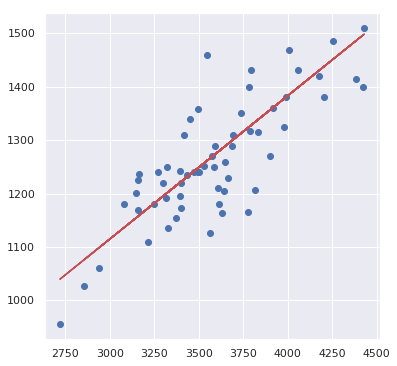

In [33]:
plt.scatter(X_TEST, Y_TEST)
plt.plot(X_TEST, YP, 'r')
plt.show()

In [34]:
np.sqrt(mean_squared_error(Y_TEST, YP))

67.69800991033969

In [35]:
model.score(X_TEST, Y_TEST)

0.6384114280623667